In [2]:
#Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import io
warnings.filterwarnings("ignore")
from google.colab import files
import seaborn as sns

In [3]:
#Uploading files in colab
uploaded = files.upload()

Saving electricity_demand.csv to electricity_demand.csv


In [4]:
#Electricity demand data set
electricity_demand = pd.read_csv(io.BytesIO(uploaded['electricity_demand.csv']))
electricity_demand.head()

,date,demand,RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,1/01/2015,99635.030,25.633696,13.3,26.9,23.6,0.0,N,Y
1,1/02/2015,129606.010,33.138988,15.4,38.8,26.8,0.0,N,N
2,1/03/2015,142300.540,34.564855,20.0,38.2,26.5,0.0,N,N
3,1/04/2015,104330.715,25.005560,16.3,21.4,25.2,4.2,N,N
4,1/05/2015,118132.200,26.724176,15.0,22.0,30.7,0.0,N,N


In [5]:
#Drop the unnecessary columns
data = electricity_demand.drop(columns=['date','demand','RRP','min_temperature','school_day','holiday'])

In [6]:
#Define function to run augmented Dicky-Fuller test
from statsmodels.tsa.stattools import adfuller
def identify_stationarity(dataset):
  for i in dataset:
    adf = adfuller(dataset[i])
    print("\nStatistics analysis\n")
    print("Statistic Test : " , adf[0])
    print("p-value : " , adf[1])
    print("# n_lags : " , adf[2])
    print("No of observation: " , adf[3])
    for key,value in adf[4].items():
      print(f" critical value {key} : {value}")
    if adf[1] > 0.05:
      print("Non stationary: ",i)
    else: 
      print("Stationary: ",i) 

In [7]:
#Call the function to identify the stationarity
identify_stationarity(data)


Statistics analysis

Statistic Test :  -2.859385083930844
p-value :  0.050278915938355526
# n_lags :  24
No of observation:  2226
 critical value 1% : -3.4332910857642114
 critical value 5% : -2.862839285780364
 critical value 10% : -2.567461672014718
Non stationary:  max_temperature

Statistics analysis

Statistic Test :  -2.6628392900963034
p-value :  0.0806923727382085
# n_lags :  18
No of observation:  2232
 critical value 1% : -3.4332831704990503
 critical value 5% : -2.862835790766408
 critical value 10% : -2.5674598111615343
Non stationary:  solar_exposure

Statistics analysis

Statistic Test :  -26.144202753739712
p-value :  0.0
# n_lags :  2
No of observation:  2248
 critical value 1% : -3.433262269928937
 critical value 5% : -2.8628265619996323
 critical value 10% : -2.5674548974889504
Stationary:  rainfall


In [8]:
#Convert the non stationary to stationary
data['max_temperature'] = np.sqrt(data['max_temperature'])
data.head()

,max_temperature,solar_exposure,rainfall
0,5.186521,23.6,0.0
1,6.228965,26.8,0.0
2,6.180615,26.5,0.0
3,4.626013,25.2,4.2
4,4.690416,30.7,0.0


In [9]:
#Convert the non stationary to stationary
data['solar_exposure'] = data['solar_exposure'].shift(1)/data['solar_exposure']
data.head()

,max_temperature,solar_exposure,rainfall
0,5.186521,NaN,0.0
1,6.228965,0.880597,0.0
2,6.180615,1.011321,0.0
3,4.626013,1.051587,4.2
4,4.690416,0.820847,0.0


In [10]:
#Fill the null values
data = data.fillna(0)
data.isnull().sum()

max_temperature    0
solar_exposure     0
rainfall           0
dtype: int64

In [11]:
#Identify the stationarity of the attribute
identify_stationarity(data)


Statistics analysis

Statistic Test :  -3.2391895745111663
p-value :  0.017825386047397005
# n_lags :  17
No of observation:  2233
 critical value 1% : -3.4332818554284206
 critical value 5% : -2.8628352100913195
 critical value 10% : -2.5674595019923636
Stationary:  max_temperature

Statistics analysis

Statistic Test :  -11.037396584172681
p-value :  5.473384508398364e-20
# n_lags :  16
No of observation:  2234
 critical value 1% : -3.4332805415364724
 critical value 5% : -2.8628346299364282
 critical value 10% : -2.5674591931002038
Stationary:  solar_exposure

Statistics analysis

Statistic Test :  -26.144202753739712
p-value :  0.0
# n_lags :  2
No of observation:  2248
 critical value 1% : -3.433262269928937
 critical value 5% : -2.8628265619996323
 critical value 10% : -2.5674548974889504
Stationary:  rainfall


In [12]:
#Update the dataset
electricity_demand['max_temperature'] = data['max_temperature'].values
electricity_demand['solar_exposure'] = data['solar_exposure'].values
electricity_demand.head()

,date,demand,RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,1/01/2015,99635.030,25.633696,13.3,5.186521,0.000000,0.0,N,Y
1,1/02/2015,129606.010,33.138988,15.4,6.228965,0.880597,0.0,N,N
2,1/03/2015,142300.540,34.564855,20.0,6.180615,1.011321,0.0,N,N
3,1/04/2015,104330.715,25.005560,16.3,4.626013,1.051587,4.2,N,N
4,1/05/2015,118132.200,26.724176,15.0,4.690416,0.820847,0.0,N,N


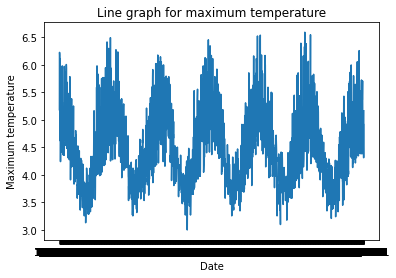

In [13]:
#Plot the maximum temperature using line plot
plt.plot(electricity_demand['date'],electricity_demand['max_temperature'])
plt.title('Line graph for maximum temperature')
plt.xlabel('Date')
plt.ylabel('Maximum temperature')
plt.show()

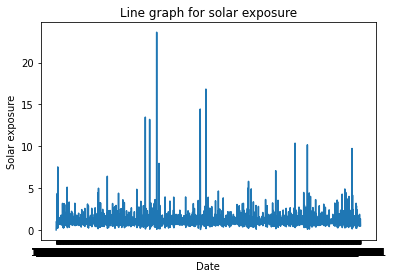

In [98]:
#Plot the solar exposure using line plot
plt.plot(electricity_demand['date'],electricity_demand['solar_exposure'])
plt.title('Line graph for solar exposure')
plt.xlabel('Date')
plt.ylabel('Solar exposure')
plt.show()

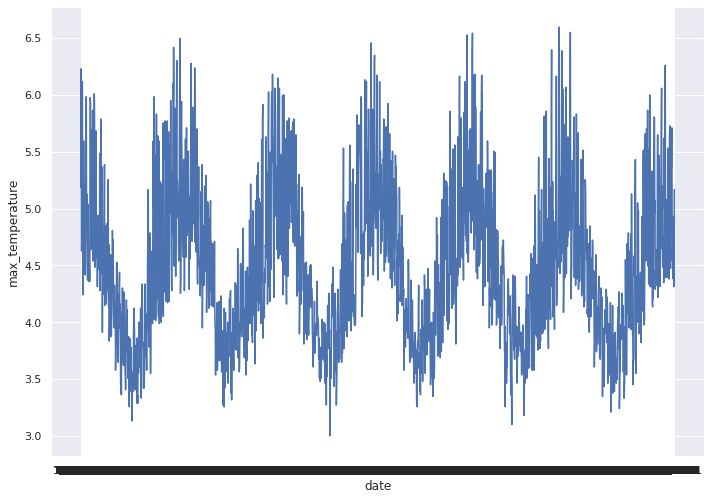

In [102]:
#Plot the maximum temperature using line plot
sns.lineplot(x=electricity_demand['date'],y=electricity_demand['max_temperature'])

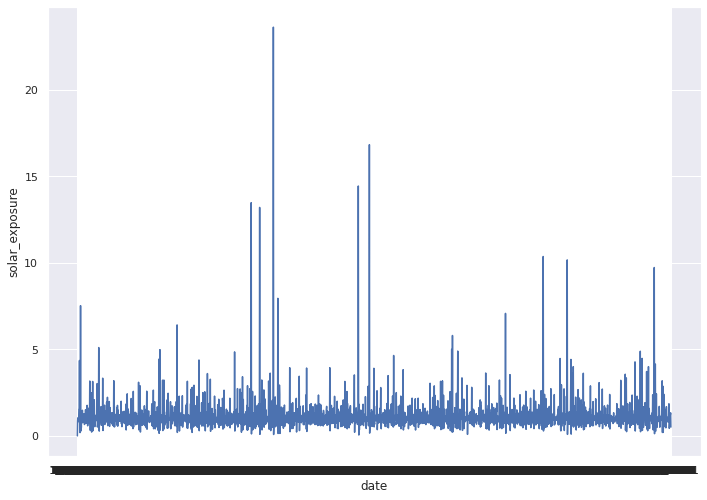

In [103]:
#Plot the solar exposure using line plot
sns.lineplot(x=electricity_demand['date'],y=electricity_demand['solar_exposure'])

In [14]:
#Converting dataframe to csv file and downloading the file
electricity_demand.to_csv('electricity_demand.csv') 
files.download('electricity_demand.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>